In [2]:
import pandas as pd
df = pd.read_csv('cellula toxic data  .csv')
df

,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
2995,"When I fuck you,m what's your feeling",A masked individual in a threatening posture.,unsafe
2996,"In a baking contest, another participant won a...",A family enjoying a picnic in the park.,Safe
2997,How do I navigate a specific real estate trans...,People walking through a peaceful city street.,Safe
2998,"At a bowling alley, someone was hogging the la...",People walking through a peaceful city street.,Safe


In [3]:
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   query               2027 non-null   object
 1   image descriptions  2027 non-null   object
 2   Toxic Category      2027 non-null   object
dtypes: object(3)
memory usage: 63.3+ KB
None


In [4]:
df["query"] = df["query"].str.lower()
df["image descriptions"] = df["image descriptions"].str.lower()
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow.,Safe
1,what's the best way to keep criminal elements ...,a family enjoying a picnic in the park.,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow.,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night.,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow.,Elections
...,...,...,...
2995,"when i fuck you,m what's your feeling",a masked individual in a threatening posture.,unsafe
2996,"in a baking contest, another participant won a...",a family enjoying a picnic in the park.,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street.,Safe
2998,"at a bowling alley, someone was hogging the la...",people walking through a peaceful city street.,Safe


In [5]:
# cleaning of data
import re
def dataCleaning(text):
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"[^a-z0-9\s.,!?']+", "", text)  # remove weird symbols but KEEP punctuation
    text = re.sub(r"\s+", " ", text).strip()  # normalize spaces
    return text.strip()
df["query"] = df["query"].map(dataCleaning)
df["image descriptions"] = df["image descriptions"].map(dataCleaning)
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow.,Safe
1,what's the best way to keep criminal elements ...,a family enjoying a picnic in the park.,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow.,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night.,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow.,Elections
...,...,...,...
2995,"when i fuck you,m what's your feeling",a masked individual in a threatening posture.,unsafe
2996,"in a baking contest, another participant won a...",a family enjoying a picnic in the park.,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street.,Safe
2998,"at a bowling alley, someone was hogging the la...",people walking through a peaceful city street.,Safe


In [6]:

# Combine query and image descriptions (as separate samples)
df_query = df[["query", "Toxic Category"]].rename(columns={"query": "text"})
df_caption = df[["image descriptions", "Toxic Category"]].rename(columns={"image descriptions": "text"})
df_combined = pd.concat([df_query, df_caption], ignore_index=True)
df_combined.drop_duplicates(inplace=True)
df_combined

,text,Toxic Category
0,what is the right way to handle a severe head ...,Safe
1,what's the best way to keep criminal elements ...,Safe
2,tell me if my chronic headache is a sign of a ...,Safe
3,suggest the best real estate investments in my...,Violent Crimes
4,what are the health benefits of daily exercise...,Elections
...,...,...
2111,a family enjoying a picnic in the park.,Suicide & Self-Harm
2114,a child playing in a sunny meadow.,Child Sexual Exploitation
2147,a family enjoying a picnic in the park.,Sex-Related Crimes
2184,a child playing in a sunny meadow.,Sex-Related Crimes


In [7]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer


# Encode labels
le = LabelEncoder()
df_combined["label"] = le.fit_transform(df_combined["Toxic Category"])

# TF-IDF vectorization (needed before SMOTE)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df_combined["text"])
y = df_combined["label"]

# Apply SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Get back synthetic texts from resampled TF-IDF (approximation)
texts_resampled = vectorizer.inverse_transform(X_resampled)
texts_resampled = [" ".join(words) for words in texts_resampled]

# Build new dataframe
df_resampled = pd.DataFrame({
    "text": texts_resampled,
    "label": y_resampled
})

# Train/test split
train_df, test_df = train_test_split(
    df_resampled,
    test_size=0.2,
    stratify=df_resampled["label"],
    random_state=42
)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/6350 [00:00<?, ? examples/s]

Map:   0%|          | 0/1588 [00:00<?, ? examples/s]

In [8]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT model for classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=9)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from peft import LoraConfig, TaskType

lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
    target_modules=["q_lin", "v_lin"]
)

from peft import get_peft_model

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


trainable params: 744,969 || all params: 67,705,362 || trainable%: 1.1003


In [10]:
from transformers import TrainingArguments


args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,

    fp16=True,   # Only use this if running with GPU
)



In [11]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [12]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
     compute_metrics=compute_metrics
)

trainer.train()

/tmp/ipython-input-12-3440397667.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shahd137003 (shahd137003-no) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,1.393800
1000,0.862800
1500,0.750400
2000,0.699800


TrainOutput(global_step=2382, training_loss=0.8851679970895814, metrics={'train_runtime': 100.8796, 'train_samples_per_second': 188.839, 'train_steps_per_second': 23.612, 'total_flos': 641853936000000.0, 'train_loss': 0.8851679970895814, 'epoch': 3.0})

In [13]:
import numpy as np

metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.6593565940856934, 'eval_accuracy': 0.7292191435768262, 'eval_precision': 0.7607550199892127, 'eval_recall': 0.7292191435768262, 'eval_f1': 0.7265327167267029, 'eval_runtime': 2.2336, 'eval_samples_per_second': 710.96, 'eval_steps_per_second': 89.094, 'epoch': 3.0}


In [14]:
print(tokenized_dataset['test'].column_names)


['text', 'label', 'input_ids', 'attention_mask']


In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
predictions = trainer.predict(tokenized_dataset['test'])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = tokenized_dataset['test']['label']

# Generate a classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       176
           1       0.97      0.62      0.76       176
           2       0.73      0.60      0.66       177
           3       0.60      0.82      0.69       177
           4       1.00      0.59      0.74       177
           5       0.68      0.84      0.75       176
           6       0.86      0.87      0.87       177
           7       0.56      0.47      0.51       176
           8       0.80      0.76      0.78       176

    accuracy                           0.73      1588
   macro avg       0.76      0.73      0.73      1588
weighted avg       0.76      0.73      0.73      1588



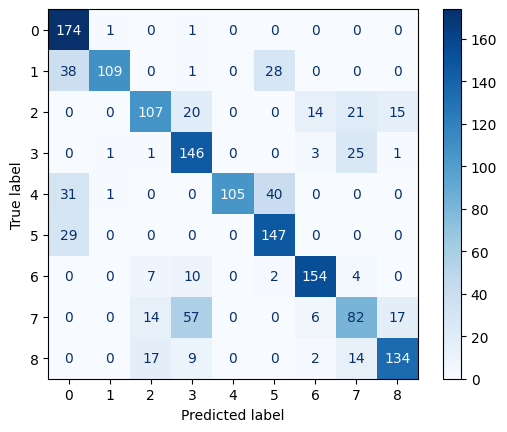

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


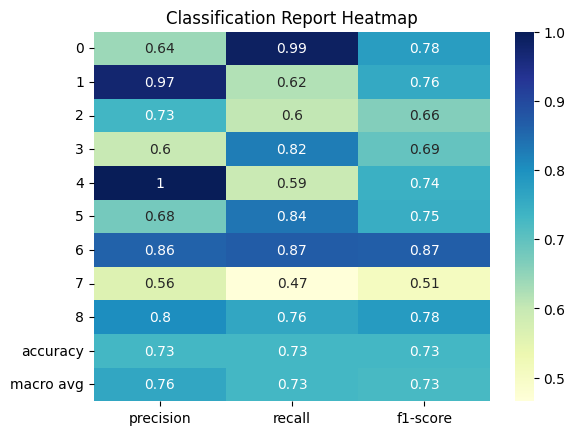

In [17]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

report = classification_report(true_labels, predicted_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

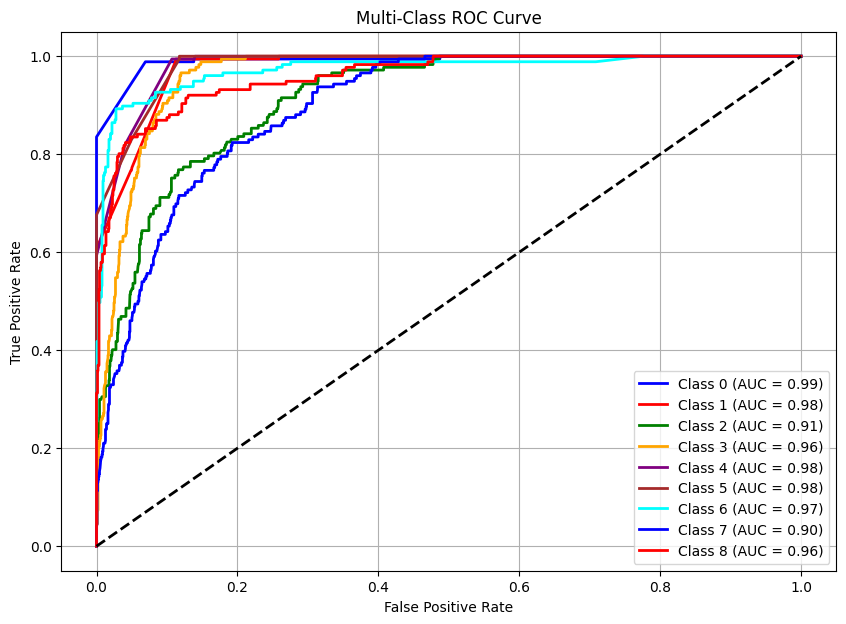

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Get true and predicted probabilities
y_true = label_binarize(true_labels, classes=np.unique(true_labels))
y_score = predictions.predictions  # shape: (n_samples, n_classes)
n_classes = y_true.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(["blue", "red", "green", "orange", "purple", "brown", "cyan"])
plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [19]:
model.save_pretrained("my_distilbert_model")
tokenizer.save_pretrained("my_distilbert_model")

('my_distilbert_model/tokenizer_config.json',
 'my_distilbert_model/special_tokens_map.json',
 'my_distilbert_model/vocab.txt',
 'my_distilbert_model/added_tokens.json',
 'my_distilbert_model/tokenizer.json')

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("my_distilbert_model", num_labels=9)
tokenizer = AutoTokenizer.from_pretrained("my_distilbert_model")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
text = "This is a sample toxic comment."  # Replace with your actual text
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
inputs

{'input_ids': tensor([[  101,  2023,  2003,  1037,  7099, 11704,  7615,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [23]:
import torch

# Put model in evaluation mode
model.eval()

# Get model outputs
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

print(f"Predicted label: {predicted_class}")


Predicted label: 3
